In [ ]:
#JaiShreeRam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data from the .dat files
users_df = pd.read_csv('users.dat', sep='::', engine='python', header=None, names=['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode'])
ratings_df = pd.read_csv('ratings.dat', sep='::', engine='python', header=None, names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies_df = pd.read_csv('movies.dat', sep='::', engine='python', header=None, names=['MovieID', 'Title', 'Genres'],encoding='latin1')


In [2]:
users_df.head()

,UserID,Gender,Age,Occupation,ZipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
#Handling Missing Values

missing_age_count = users_df['Age'].isnull().sum()
if missing_age_count > 0:
    print(f"Number of missing values in 'Age': {missing_age_count}")

In [6]:
users_df.drop_duplicates(subset=['UserID'], inplace=True)
ratings_df.drop_duplicates(subset=['UserID', 'MovieID'], inplace=True)


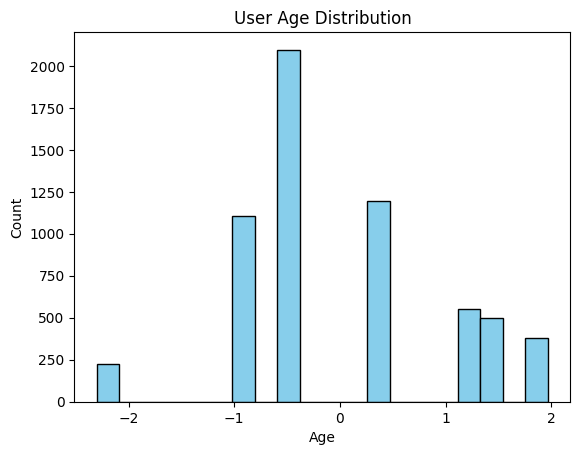

In [18]:
# Explore user age distribution
plt.hist(users_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

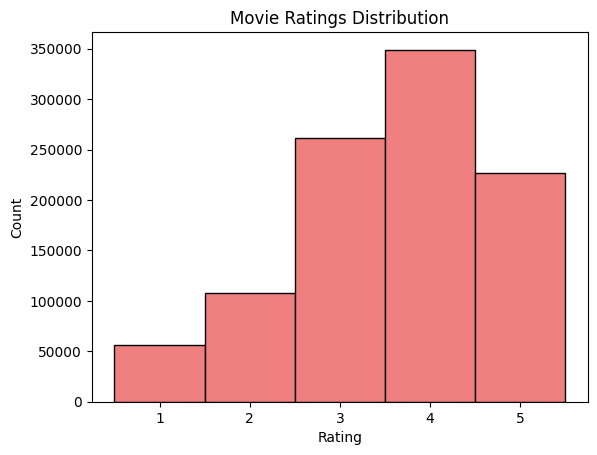

In [19]:
# Explore movie ratings distribution
plt.hist(ratings_df['Rating'], bins=5, color='lightcoral', edgecolor='black', range=(0.5, 5.5))
plt.title('Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In [15]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

test_size = 0.2

ratings_train, ratings_test = train_test_split(ratings_df, test_size=test_size, random_state=42)



In [17]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163345 sha256=51187e8fa1ecd5378ea4d0f5b17eb1630b79778ac56fc815a5a2f3ac07afb502
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [19]:
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the data using Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_train[['UserID', 'MovieID', 'Rating']], reader)

# Build and train a user-based collaborative filtering model
sim_options = {'name': 'cosine', 'user_based': True}
model = KNNWithMeans(sim_options=sim_options)
trainset = data.build_full_trainset()
model.fit(trainset)

# Make predictions on the test set
testset = [(row['UserID'], row['MovieID'], row['Rating']) for index, row in ratings_test.iterrows()]
predictions = model.test(testset)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9440
MAE:  0.7527


In [28]:
user_id_to_predict = 6040
movie_id_to_predict = 1091


predicted_rating = model.predict(user_id_to_predict, movie_id_to_predict).est

print(f"Predicted Rating for User {user_id_to_predict} and Movie {movie_id_to_predict}: {predicted_rating:.2f}")


Predicted Rating for User 6040 and Movie 1091: 1.96


In [24]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
